In [1]:
from tensorly.metrics.regression import RMSE
from tensorly.decomposition import parafac
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from parafac_normalization_comparison import *

#tensor
array=np.random.rand(30, 40, 20)
tensor=tl.tensor(array,dtype='float32')

#parameters
init='svd'
svd='numpy_svd'
rank=10

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together
5. Current tensorly normalization

In [2]:
#normalized improved parafac result
tic = time.time()
tensornorm1, errorsnorm1, weights_iter1 = parafac_normalize_1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm2, errorsnorm2, weights_iter2 = parafac_normalize_2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm3, errorsnorm3, weights_iter3 = parafac_normalize_3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm4, errorsnorm4, weights_iter4 = parafac_normalize_4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm5, errorsnorm5, weights_iter5 = parafac_normalize_5(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm5, factorsnorm5 = tensornorm5
cp_reconstructionnorm5 = tl.cp_to_tensor((weightsnorm5, factorsnorm5))
time_cp5 = time.time()-tic

# Error per iteration 

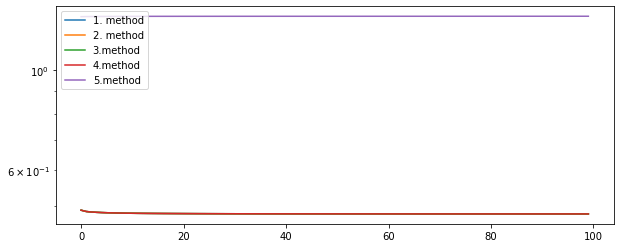

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4, errorsnorm5)

# Weights per iteration 

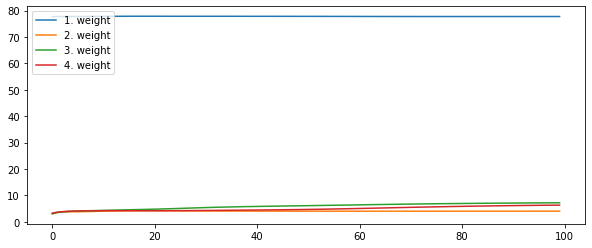

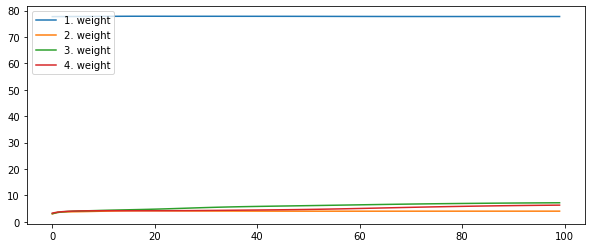

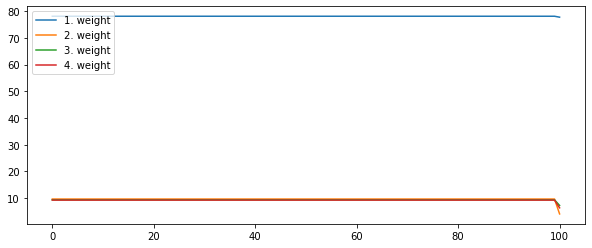

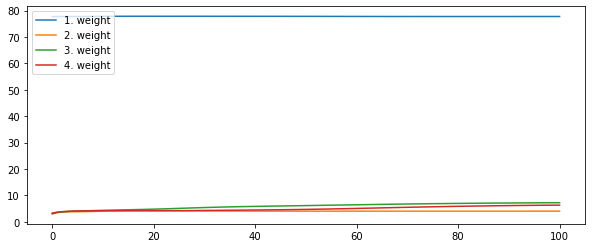

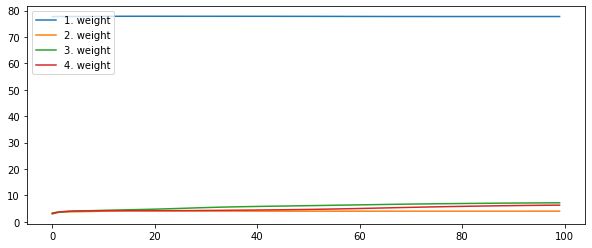

In [4]:
plot_weights(weights_iter1)
plot_weights(weights_iter2)
plot_weights(weights_iter3)
plot_weights(weights_iter4)
plot_weights(weights_iter5)

# Last weights

In [5]:
print(weightsnorm1[:5])
print(weightsnorm2[:5])
print(weightsnorm3[:5])
print(weightsnorm4[:5])
print(weightsnorm5[:5])

[77.74343   4.06819   7.239527  6.34782   4.836437]
[77.74355    4.0681596  7.243378   6.3463273  4.835851 ]
[77.74368    4.068142   7.2459693  6.3453712  4.835442 ]
[77.74428    4.0680275  7.261552   6.3387184  4.8325973]
[77.74323    4.0682254  7.233136   6.349939   4.837984 ]


# Mean of factors

In [6]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))
print(tl.mean(factorsnorm5[0]), tl.mean(factorsnorm5[1]), tl.mean(factorsnorm5[2]))

0.0025982207 0.021014506 0.045159034
-0.03517905 0.013926081 -0.013013136
-0.01844924 0.02548135 -0.00835251
-0.013769013 -0.0115582235 0.004872227
0.012102845 0.014567027 0.012467453


In [7]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))
print(RMSE(tensor,cp_reconstructionnorm5))

0.2775677
0.2775675
0.27756736
0.2775664
0.277568


In [8]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))
print(str(time_cp5))

0.24030470848083496
0.2593197822570801
0.22183823585510254
0.3123948574066162
0.22820639610290527
